This is version 1 of the notebook using the dataset with dummy response variables.

# TODO

- NEED MORE DATA POINTS
- dendrogram: which groups are closest
- ask Cory whether inverse PCA transformation can be used to get transformation for future data points to be comparable (the 'index' idea)

In [1]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(style="white")
#sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_fp = '/P/vacou/data_ss31.tsv'
#d_orig = pd.read_csv(data_fp, sep='\t')

In [21]:
d, md, full_df = preprocess_vc(data_fp, version=1)
response_column = 'dummy_NVC'

# Exploratory

In [4]:
full_df.columns.tolist()[:20]

['dummy_NVC',
 'Group',
 'Animal',
 'Trial',
 'Run_Duration_(s)_Mean',
 'Run_Average_Speed_(cm/s)_Mean',
 'Run_Maximum_Variation_(%)_Mean',
 'RF_Stand_(s)_Mean',
 'RF_StandIndex_Mean',
 'RF_MaxContactAt_(%)_Mean',
 'RF_MaxContactArea_(cm²)_Mean',
 'RF_MaxContactMaxIntensity_Mean',
 'RF_MaxContactMeanIntensity_Mean',
 'RF_PrintLength_(cm)_Mean',
 'RF_PrintWidth_(cm)_Mean',
 'RF_PrintArea_(cm²)_Mean',
 'RF_MaxIntensityAt_(%)_Mean',
 'RF_MaxIntensity_Mean',
 'RF_MinIntensity_Mean',
 'RF_MeanIntensity_Mean']

In [5]:
d.describe()

,Run_Duration_(s)_Mean,Run_Average_Speed_(cm/s)_Mean,Run_Maximum_Variation_(%)_Mean,RF_Stand_(s)_Mean,RF_StandIndex_Mean,RF_MaxContactAt_(%)_Mean,RF_MaxContactArea_(cm²)_Mean,RF_MaxContactMaxIntensity_Mean,RF_MaxContactMeanIntensity_Mean,RF_PrintLength_(cm)_Mean,...,Couplings_LH->LF_Mean,Couplings_LH->LF_CStat_Mean,Couplings_LH->LF_CStat_R,Support_Zero_(%),Support_Single_(%),Support_Diagonal_(%),Support_Girdle_(%),Support_Lateral_(%),Support_Three_(%),Support_Four_(%)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,4.631186,15.492489,51.529949,0.230433,-3.023624,39.615562,0.428536,142.793486,73.484871,0.986736,...,48.672825,48.354819,0.813539,0.018159,1.230350,56.223378,2.212682,0.706064,30.573390,9.035976
std,0.826640,4.447181,16.465925,0.034025,0.774734,5.762326,0.108228,16.103326,8.310848,0.137407,...,2.735637,2.793255,0.079611,0.087132,0.819881,8.201361,3.292262,0.599458,5.838240,4.262897
min,2.743659,8.233310,23.000000,0.164427,-5.539478,25.672339,0.214033,106.707317,58.552967,0.751865,...,42.860225,40.925879,0.600035,0.000000,0.000000,41.612903,0.182983,0.000000,14.995788,2.623360
25%,3.985813,13.795579,42.000000,0.201762,-3.471036,34.480518,0.358367,135.054054,66.615342,0.883123,...,46.883446,46.631101,0.770077,0.000000,0.618812,48.133199,0.448430,0.178333,26.779463,5.412794
50%,4.605380,14.787200,50.200000,0.235737,-2.845816,40.175398,0.438507,142.527778,70.556728,1.014476,...,48.719175,48.491783,0.826017,0.000000,1.191121,57.310268,0.911641,0.631136,30.180426,8.791209
75%,5.361413,16.656712,59.400000,0.259026,-2.522384,42.746750,0.513800,152.180556,81.102032,1.105587,...,50.538607,50.184982,0.856933,0.000000,1.693480,62.602515,2.274642,0.950570,34.510595,11.486963
max,6.077211,36.367256,99.100000,0.288616,-1.907316,52.107865,0.646166,174.225000,88.569989,1.205004,...,54.737913,54.550278,0.949842,0.578035,3.660886,68.508706,13.068845,2.204262,41.624365,19.700461


In [6]:
md.head()

,dummy_NVC,Group,Animal,Trial
Animal,,,,
1.1,12,young ctrl,1.1,Trial0001
1.2,12,young ctrl,1.2,Trial0002
1.3,12,young ctrl,1.3,Trial0003
1.4,12,young ctrl,1.4,Trial0004
3.2,12,young ctrl,3.2,Trial0010


In [7]:
md.Group.value_counts()

ss31 aged injected           20
young ctrl                   15
aged control sal injected    10
Name: Group, dtype: int64

# Top important features

### highest variance selection

In [8]:
selected_v, variances = sel_var(normalize_pd(d, 0), 0.001)

In [9]:
print("Features with highest variance")
pd.DataFrame(variances.sort_values(ascending=False)[:15], columns = ['variance (after normalisation)'])

Features with highest variance


,variance (after normalisation)
Support_Zero_(%),0.021277
StepSequence_RB_(%),0.020404
PhaseDispersions_LF->RH_Mean,0.019405
StepSequence_RA_(%),0.018752
PhaseDispersions_RF->LH_Mean,0.018450
Couplings_RF->LH_CStat_Mean,0.015239
Support_Girdle_(%),0.015200
PhaseDispersions_RF->LH_CStat_Mean,0.015140
PhaseDispersions_LF->RH_CStat_Mean,0.014480
Couplings_LF->RH_CStat_Mean,0.013077


### f regression selection

In [22]:
selected_a = sel_anova(normalize_pd(d, 0), md[response_column], k=15)

In [23]:
print("Features selected by f_regression")
pd.DataFrame(selected_a.columns)

Features selected by f_regression


,0
0,RF_MaxContactMeanIntensity_Mean
1,RF_MinIntensity_Mean
2,RF_MeanIntensity_Mean
3,RH_MinIntensity_Mean
4,LF_MaxContactMeanIntensity_Mean
5,LF_MinIntensity_Mean
6,LF_MeanIntensity_Mean
7,LH_MaxContactMeanIntensity_Mean
8,LH_MinIntensity_Mean
9,LH_MeanIntensity_Mean


### mutual information regression selection

In [25]:
selected_m = sel_mi(normalize_pd(d, 0), md[response_column], k=15)

In [17]:
print("Features selected by mutual_info_regression")
pd.DataFrame(selected_m.columns)

Features selected by mutual_info_regression


,0
0,RF_MaxContactArea_(cm²)_Mean
1,RF_PrintLength_(cm)_Mean
2,RF_PrintArea_(cm²)_Mean
3,RH_MaxContactArea_(cm²)_Mean
4,RH_PrintLength_(cm)_Mean
5,LF_MaxContactArea_(cm²)_Mean
6,LF_PrintLength_(cm)_Mean
7,LF_PrintArea_(cm²)_Mean
8,LH_PrintLength_(cm)_Mean
9,FP_MaxContactArea_(cm²)_Mean


### Comparison of feature reduction methods

In [18]:
print("Number of selected features that overlap between methods (out of 15):")
print(' - var-f_reg:', str(sum([i in selected_a.columns.tolist()
                              for i in variances.sort_values(ascending=False)[:15].index.tolist()])),
                             "features.")
print(' - var-mi_reg:', str(sum([i in selected_m.columns.tolist()
                              for i in variances.sort_values(ascending=False)[:15].index.tolist()])),
                             "features.")
print(' - f_reg-mi_reg:', str(sum([i in selected_a.columns.tolist()
                              for i in selected_m.columns.tolist()])),
                             "features. \nHm.")

Number of selected features that overlap between methods (out of 15):
 - var-f_reg: 0 features.
 - var-mi_reg: 2 features.
 - f_reg-mi_reg: 0 features. 
Hm.


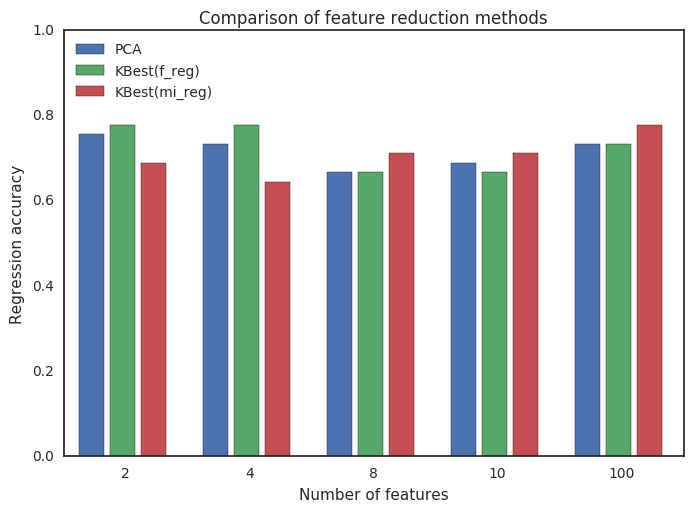

In [26]:
compare_dim_red_methods(normalize_pd(d, 0), md[response_column])

# PCA

In [27]:
comps, exvar, _ = get_pc(normalize_pd(d,0, 'normalize'),2)

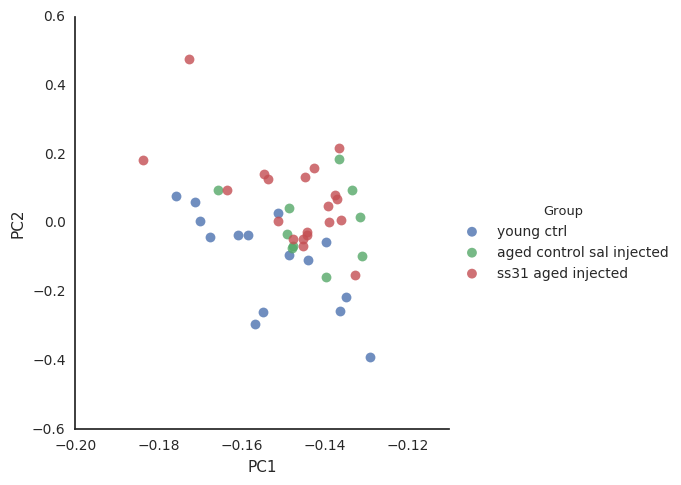

In [28]:
plot_comps = get_plot_comps(comps, md)
p2 = sns.lmplot(x='PC1', y='PC2', hue='Group', data=plot_comps, ci=None, fit_reg=False,
               scatter_kws={"s":50})

The first two components seem to actually cluster both aged groups together, with some difference between the 'aged' cluster and 'young' cluster. There are some outliers from the Group 'aged treated'...

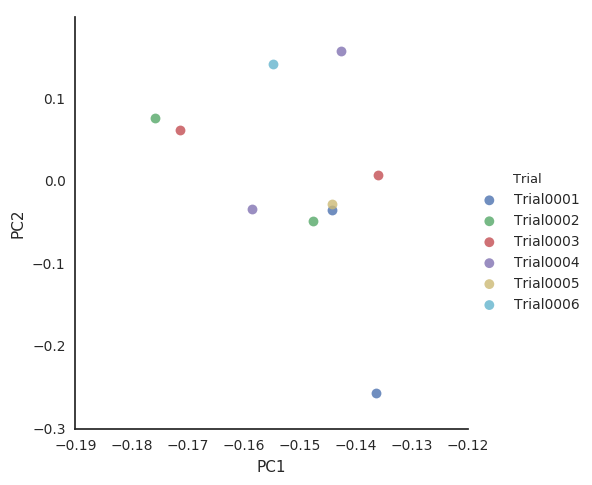

In [29]:
p2 = sns.lmplot(x='PC1', y='PC2', hue='Trial', data=plot_comps.sort_values('Trial').iloc[:10,:],
                ci=None, fit_reg=False, scatter_kws={"s":50})#, y_jitter=0.01, x_jitter=0.01)

Trials seem comprise of one sample well within the major cluster and another within the outlier cluster - this suggests some bias within Trials?

Higher number Trials (possibly those with only one animal inn them) seem to cluster within the major cluster.

# Bonus: python heatmap example for Tomasz
(yes this is Polish spelling ;) )

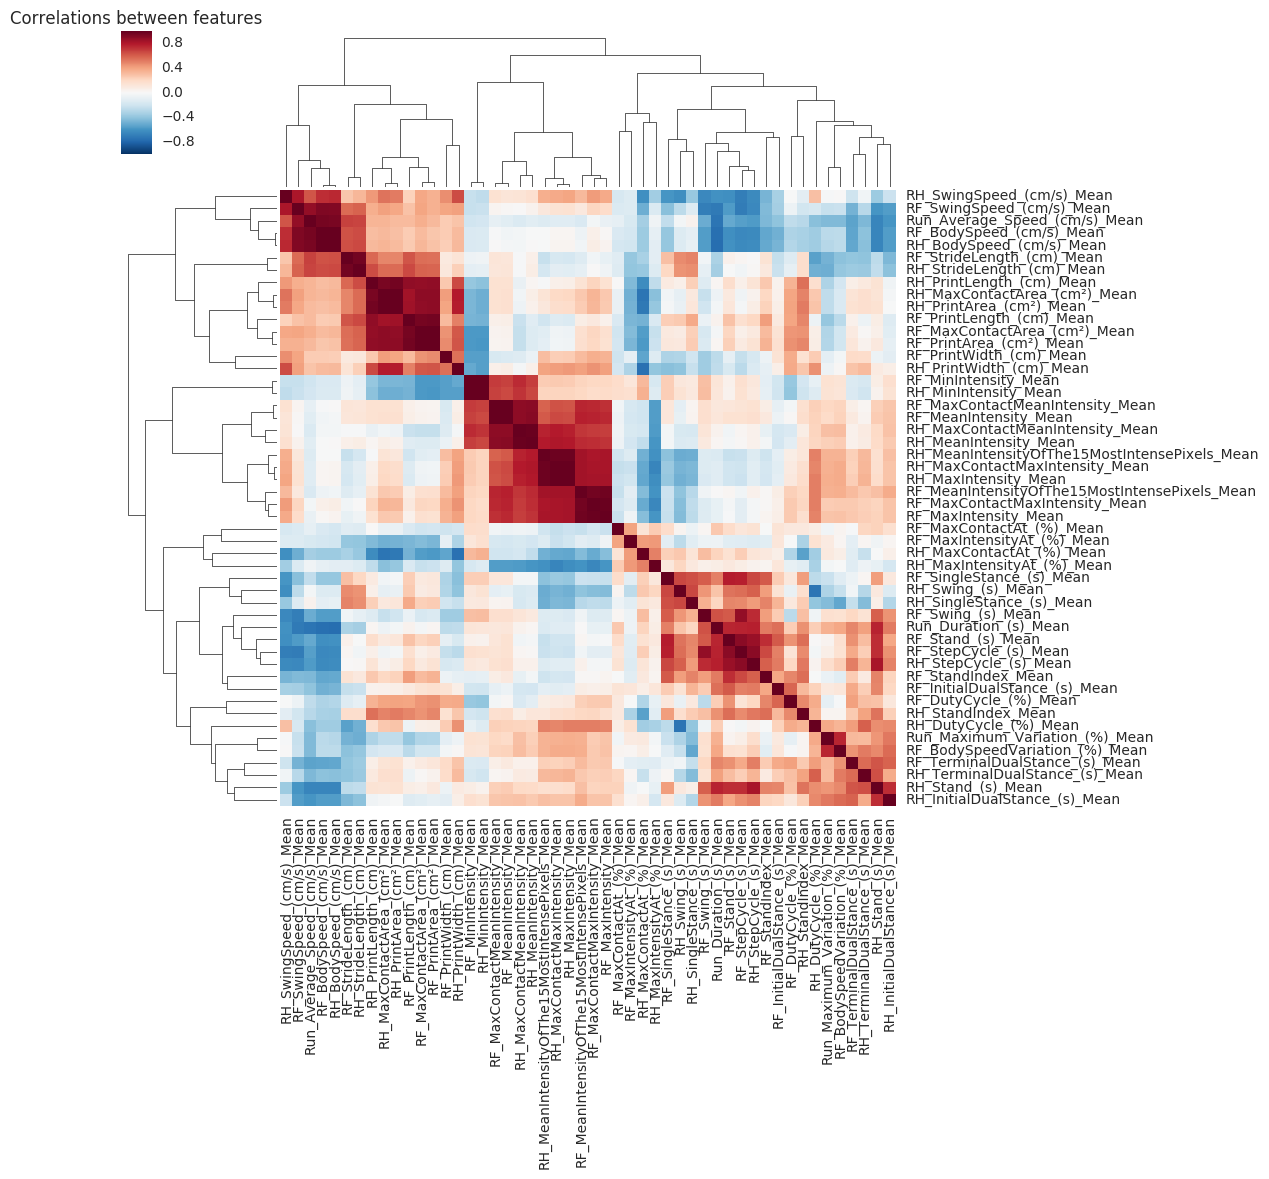

In [30]:
# import modules:
# > import seaborn as sns
# > import matplotlib.pyplot as plt

# normalize data, calculate correlations between features, and subset to first 50 features for clarity
corrs = normalize_pd(d, 0).corr().ix[:50, :50]

# draw plot; also check out sns.heatmap()
plt.figure()
p3 = sns.clustermap(corrs)

# rotate the labels of the y axis so they ar readable... Add title
plt.setp(p3.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title("Correlations between features")

# show plot
plt.show()

# Notes

In [ ]:
# heatmap: linkages!
p3.dendrogram_col.linkage # linkage matrix for columns
p3.dendrogram_row.linkage # linkage matrix for rows